In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'mathtext.default':'regular'})

In [166]:
sim1_random_df = pd.read_csv('SIM-1 Individualistic, Non-reactive, Random-table.csv',skiprows=6)
sim1_random_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim1_random_df = sim1_random_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim1_random_df['total-inspectees'] = sim1_random_df['#-compliant-inspectees'] + sim1_random_df['#-unintentional-violators'] + sim1_random_df['#-conscious-violators'] + sim1_random_df['#-criminal-violators'] 
sim1_random_df['perc-compliant'] = sim1_random_df['#-compliant-inspectees'] / sim1_random_df['total-inspectees'] * 100
sim1_random_df['perc-compliant'] = sim1_random_df['perc-compliant'].fillna(0)
sim1_random_df['perc-unintentional'] = sim1_random_df['#-unintentional-violators'] / sim1_random_df['total-inspectees'] * 100
sim1_random_df['perc-unintentional'] = sim1_random_df['perc-unintentional'].fillna(0)
sim1_random_df['perc-conscious'] = sim1_random_df['#-conscious-violators'] / sim1_random_df['total-inspectees'] * 100
sim1_random_df['perc-conscious'] = sim1_random_df['perc-conscious'].fillna(0)
sim1_random_df['perc-criminal'] = sim1_random_df['#-criminal-violators'] / sim1_random_df['total-inspectees'] * 100
sim1_random_df['perc-criminal'] = sim1_random_df['perc-criminal'].fillna(0)
sim1_random_df['perc-noncompliant'] = (sim1_random_df['perc-unintentional'] + sim1_random_df['perc-conscious'] + sim1_random_df['perc-criminal']) 
sim1_random_step_mean = sim1_random_df.groupby(['step'], as_index=False).mean()
sim1_random_step_mean = sim1_random_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim1_random_step_std = sim1_random_df.groupby(['step'], as_index=False).std()
sim1_random_step_std = sim1_random_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [167]:
sim1_risknoncomp_df = pd.read_csv('SIM-1 Individualistic, Non-reactive, Risk non-compliant-table.csv',skiprows=6)
sim1_risknoncomp_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim1_risknoncomp_df = sim1_risknoncomp_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim1_risknoncomp_df['total-inspectees'] = sim1_risknoncomp_df['#-compliant-inspectees'] + sim1_risknoncomp_df['#-unintentional-violators'] + sim1_risknoncomp_df['#-conscious-violators'] + sim1_risknoncomp_df['#-criminal-violators'] 
sim1_risknoncomp_df['perc-compliant'] = sim1_risknoncomp_df['#-compliant-inspectees'] / sim1_risknoncomp_df['total-inspectees'] * 100
sim1_risknoncomp_df['perc-compliant'] = sim1_risknoncomp_df['perc-compliant'].fillna(0)
sim1_risknoncomp_df['perc-unintentional'] = sim1_risknoncomp_df['#-unintentional-violators'] / sim1_risknoncomp_df['total-inspectees'] * 100
sim1_risknoncomp_df['perc-unintentional'] = sim1_risknoncomp_df['perc-unintentional'].fillna(0)
sim1_risknoncomp_df['perc-conscious'] = sim1_risknoncomp_df['#-conscious-violators'] / sim1_risknoncomp_df['total-inspectees'] * 100
sim1_risknoncomp_df['perc-conscious'] = sim1_risknoncomp_df['perc-conscious'].fillna(0)
sim1_risknoncomp_df['perc-criminal'] = sim1_risknoncomp_df['#-criminal-violators'] / sim1_risknoncomp_df['total-inspectees'] * 100
sim1_risknoncomp_df['perc-criminal'] = sim1_risknoncomp_df['perc-criminal'].fillna(0)
sim1_risknoncomp_df['perc-noncompliant'] = (sim1_risknoncomp_df['perc-unintentional'] + sim1_risknoncomp_df['perc-conscious'] + sim1_risknoncomp_df['perc-criminal']) 
sim1_risknoncomp_step_mean = sim1_risknoncomp_df.groupby(['step'], as_index=False).mean()
sim1_risknoncomp_step_mean = sim1_risknoncomp_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim1_risknoncomp_step_std = sim1_risknoncomp_df.groupby(['step'], as_index=False).std()
sim1_risknoncomp_step_std = sim1_risknoncomp_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [168]:
sim1_riskoffense_df = pd.read_csv('SIM-1 Individualistic, Non-reactive, Risk offense-table.csv',skiprows=6)
sim1_riskoffense_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim1_riskoffense_df = sim1_riskoffense_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim1_riskoffense_df['total-inspectees'] = sim1_riskoffense_df['#-compliant-inspectees'] + sim1_riskoffense_df['#-unintentional-violators'] + sim1_riskoffense_df['#-conscious-violators'] + sim1_riskoffense_df['#-criminal-violators'] 
sim1_riskoffense_df['perc-compliant'] = sim1_riskoffense_df['#-compliant-inspectees'] / sim1_riskoffense_df['total-inspectees'] * 100
sim1_riskoffense_df['perc-compliant'] = sim1_riskoffense_df['perc-compliant'].fillna(0)
sim1_riskoffense_df['perc-unintentional'] = sim1_riskoffense_df['#-unintentional-violators'] / sim1_riskoffense_df['total-inspectees'] * 100
sim1_riskoffense_df['perc-unintentional'] = sim1_riskoffense_df['perc-unintentional'].fillna(0)
sim1_riskoffense_df['perc-conscious'] = sim1_riskoffense_df['#-conscious-violators'] / sim1_riskoffense_df['total-inspectees'] * 100
sim1_riskoffense_df['perc-conscious'] = sim1_riskoffense_df['perc-conscious'].fillna(0)
sim1_riskoffense_df['perc-criminal'] = sim1_riskoffense_df['#-criminal-violators'] / sim1_riskoffense_df['total-inspectees'] * 100
sim1_riskoffense_df['perc-criminal'] = sim1_riskoffense_df['perc-criminal'].fillna(0)
sim1_riskoffense_df['perc-noncompliant'] = (sim1_riskoffense_df['perc-unintentional'] + sim1_riskoffense_df['perc-conscious'] + sim1_riskoffense_df['perc-criminal']) 
sim1_riskoffense_step_mean = sim1_riskoffense_df.groupby(['step'], as_index=False).mean()
sim1_riskoffense_step_mean = sim1_riskoffense_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim1_riskoffense_step_std = sim1_riskoffense_df.groupby(['step'], as_index=False).std()
sim1_riskoffense_step_std = sim1_riskoffense_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [169]:
sim1_mixnoncomp_df = pd.read_csv('SIM-1 Individualistic, Non-reactive, Mix 50 random, 50 risk non-compliant-table.csv',skiprows=6)
sim1_mixnoncomp_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim1_mixnoncomp_df = sim1_mixnoncomp_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim1_mixnoncomp_df['total-inspectees'] = sim1_mixnoncomp_df['#-compliant-inspectees'] + sim1_mixnoncomp_df['#-unintentional-violators'] + sim1_mixnoncomp_df['#-conscious-violators'] + sim1_mixnoncomp_df['#-criminal-violators'] 
sim1_mixnoncomp_df['perc-compliant'] = sim1_mixnoncomp_df['#-compliant-inspectees'] / sim1_mixnoncomp_df['total-inspectees'] * 100
sim1_mixnoncomp_df['perc-compliant'] = sim1_mixnoncomp_df['perc-compliant'].fillna(0)
sim1_mixnoncomp_df['perc-unintentional'] = sim1_mixnoncomp_df['#-unintentional-violators'] / sim1_mixnoncomp_df['total-inspectees'] * 100
sim1_mixnoncomp_df['perc-unintentional'] = sim1_mixnoncomp_df['perc-unintentional'].fillna(0)
sim1_mixnoncomp_df['perc-conscious'] = sim1_mixnoncomp_df['#-conscious-violators'] / sim1_mixnoncomp_df['total-inspectees'] * 100
sim1_mixnoncomp_df['perc-conscious'] = sim1_mixnoncomp_df['perc-conscious'].fillna(0)
sim1_mixnoncomp_df['perc-criminal'] = sim1_mixnoncomp_df['#-criminal-violators'] / sim1_mixnoncomp_df['total-inspectees'] * 100
sim1_mixnoncomp_df['perc-criminal'] = sim1_mixnoncomp_df['perc-criminal'].fillna(0)
sim1_mixnoncomp_df['perc-noncompliant'] = (sim1_mixnoncomp_df['perc-unintentional'] + sim1_mixnoncomp_df['perc-conscious'] + sim1_mixnoncomp_df['perc-criminal']) 
sim1_mixnoncomp_step_mean = sim1_mixnoncomp_df.groupby(['step'], as_index=False).mean()
sim1_mixnoncomp_step_mean = sim1_mixnoncomp_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim1_mixnoncomp_step_std = sim1_mixnoncomp_df.groupby(['step'], as_index=False).std()
sim1_mixnoncomp_step_std = sim1_mixnoncomp_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [170]:
sim1_mixoffense_df = pd.read_csv('SIM-1 Individualistic, Non-reactive, Mix 50 random, 50 risk offense-table.csv',skiprows=6)
sim1_mixoffense_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim1_mixoffense_df = sim1_mixoffense_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim1_mixoffense_df['total-inspectees'] = sim1_mixoffense_df['#-compliant-inspectees'] + sim1_mixoffense_df['#-unintentional-violators'] + sim1_mixoffense_df['#-conscious-violators'] + sim1_mixoffense_df['#-criminal-violators'] 
sim1_mixoffense_df['perc-compliant'] = sim1_mixoffense_df['#-compliant-inspectees'] / sim1_mixoffense_df['total-inspectees'] * 100
sim1_mixoffense_df['perc-compliant'] = sim1_mixoffense_df['perc-compliant'].fillna(0)
sim1_mixoffense_df['perc-unintentional'] = sim1_mixoffense_df['#-unintentional-violators'] / sim1_mixoffense_df['total-inspectees'] * 100
sim1_mixoffense_df['perc-unintentional'] = sim1_mixoffense_df['perc-unintentional'].fillna(0)
sim1_mixoffense_df['perc-conscious'] = sim1_mixoffense_df['#-conscious-violators'] / sim1_mixoffense_df['total-inspectees'] * 100
sim1_mixoffense_df['perc-conscious'] = sim1_mixoffense_df['perc-conscious'].fillna(0)
sim1_mixoffense_df['perc-criminal'] = sim1_mixoffense_df['#-criminal-violators'] / sim1_mixoffense_df['total-inspectees'] * 100
sim1_mixoffense_df['perc-criminal'] = sim1_mixoffense_df['perc-criminal'].fillna(0)
sim1_mixoffense_df['perc-noncompliant'] = (sim1_mixoffense_df['perc-unintentional'] + sim1_mixoffense_df['perc-conscious'] + sim1_mixoffense_df['perc-criminal']) 
sim1_mixoffense_step_mean = sim1_mixoffense_df.groupby(['step'], as_index=False).mean()
sim1_mixoffense_step_mean = sim1_mixoffense_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim1_mixoffense_step_std = sim1_mixoffense_df.groupby(['step'], as_index=False).std()
sim1_mixoffense_step_std = sim1_mixoffense_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

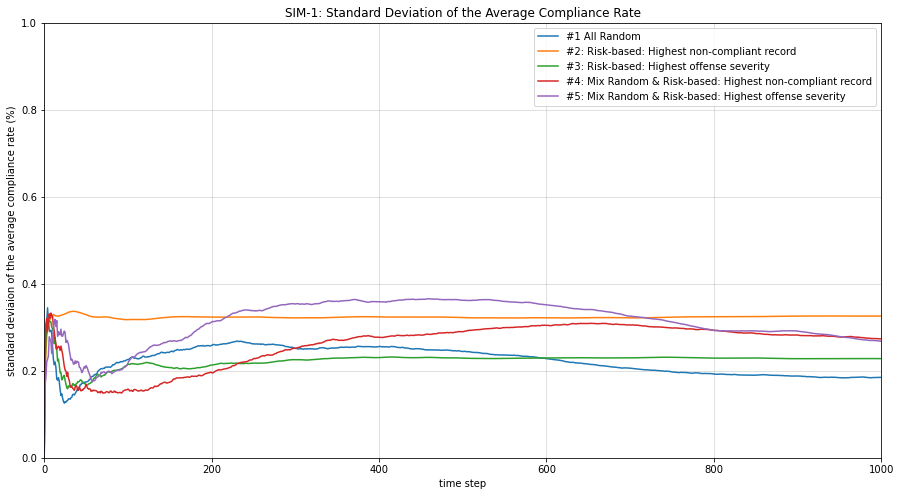

<Figure size 432x288 with 0 Axes>

In [171]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(np.arange(0, 1000.1, 100))
#ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
#ax.set_yticks(np.arange(0,100.1,10))
#ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim1_random_step_std['step'], sim1_random_step_std['avg-compliance-rate-std'],label="#1 All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['avg-compliance-rate-std'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['avg-compliance-rate-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['avg-compliance-rate-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['avg-compliance-rate-std'],label="#5: Mix Random & Risk-based: Highest offense severity")

plt.title("SIM-1: Standard Deviation of the Average Compliance Rate")
plt.xlabel('time step')
plt.ylabel('standard deviaion of the average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-1 Avg Compliance Rate.png', dpi=300, bbox_inches='tight')

In [172]:
def find_std(tick, df):
    std_ticks = {}
    for i, t in enumerate(tick):
        std_tick = df.loc[df['step'] == t, 'avg-compliance-rate-std'].values[0]
        std_ticks[f'std_tick_{t}'] = std_tick
    return std_ticks

In [173]:
sim1_random_step_std

,step,run,avg-compliance-rate-std,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,total-inspectees,perc-compliant-std,perc-unintentional-std,perc-conscious-std,perc-criminal-std,perc-noncompliant-std
0,0,14.57738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,14.57738,0.235997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,14.57738,0.275961,3.581358,5.909142,5.147458,1.984532,0.000000,0.045472,0.075027,0.065356,0.025197,0.045472
3,3,14.57738,0.312070,4.874088,8.603654,7.748601,2.469487,0.141421,0.061905,0.109223,0.098395,0.031359,0.061905
4,4,14.57738,0.344944,5.577835,10.320655,8.355104,2.913725,0.197949,0.070791,0.131037,0.106081,0.036998,0.070791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,14.57738,0.184715,38.145056,34.190200,35.287947,30.814925,0.000000,0.484197,0.433996,0.447930,0.391152,0.484197
997,997,14.57738,0.184886,37.591380,32.963610,34.869488,30.410149,0.000000,0.477169,0.418426,0.442619,0.386014,0.477169
998,998,14.57738,0.184916,37.768813,34.890991,34.545445,30.056111,0.000000,0.479421,0.442891,0.438505,0.381520,0.479421
999,999,14.57738,0.185020,38.641333,35.355916,33.746740,30.462422,0.000000,0.490497,0.448793,0.428367,0.386677,0.490497


In [181]:
random_std = find_std(tick, sim1_random_step_std)
risknoncomp_std = find_std(tick, sim1_risknoncomp_step_std)
riskoffense_std = find_std(tick, sim1_riskoffense_step_std)
mixnoncomp_std = find_std(tick, sim1_mixnoncomp_step_std)
mixoffense_std = find_std(tick, sim1_mixoffense_step_std)
random_std

{'std_tick_10': 0.2542691094877573,
 'std_tick_100': 0.225626005602377,
 'std_tick_1000': 0.18502784935794966}

In [182]:
def convert_to_pd(df):
    df = pd.DataFrame(df.items(),columns=['step','avg-compliance-rate-std'])
    df['step'] = df['step'].str.extract(r'(\d+)$').astype(int)
    return df

In [183]:
random_std = convert_to_pd(random_std)
risknoncomp_std = convert_to_pd(risknoncomp_std)
riskoffense_std = convert_to_pd(riskoffense_std)
mixnoncomp_std = convert_to_pd(mixnoncomp_std)
mixoffense_std = convert_to_pd(mixoffense_std)
random_std

,step,avg-compliance-rate-std
0,10,0.254269
1,100,0.225626
2,1000,0.185028


In [184]:
tick = [ 10, 100, 1000]

x: [10, 100, 1000]
y: [0.2542691094877573, 0.225626005602377, 0.18502784935794966]
x: [10, 100, 1000]
y: [0.32798455949280403, 0.3177012624158969, 0.32584242651538525]
x: [10, 100, 1000]
y: [0.29585768115542577, 0.21551420122452375, 0.2280520768921408]
x: [10, 100, 1000]
y: [0.3260868546218018, 0.15802896439193848, 0.27326928552301893]
x: [10, 100, 1000]
y: [0.2686273779621704, 0.21736814662865012, 0.26810541950847167]


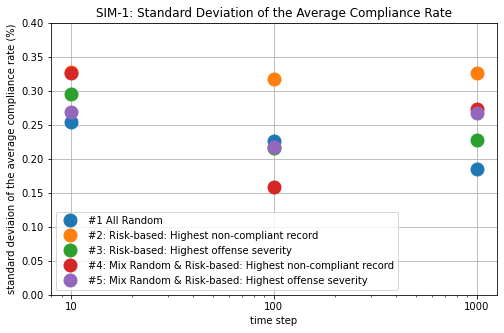

In [185]:
dataframes = [random_std,risknoncomp_std,riskoffense_std,mixnoncomp_std,mixoffense_std]
labels = ["#1 All Random",
          "#2: Risk-based: Highest non-compliant record",
          "#3: Risk-based: Highest offense severity",
          "#4: Mix Random & Risk-based: Highest non-compliant record",
          "#5: Mix Random & Risk-based: Highest offense severity"]
plt.figure(figsize=(8, 5))
#ax = fig.add_subplot(1, 1, 1)
 
for i, df in enumerate(dataframes):
    result = find_std(tick, df)
    #result = convert_to_pd(df)
    x = [int(key.split('_')[2]) for key in result.keys()]
    y = list(result.values())
    print(f"x: {x}")
    print(f"y: {y}")
    plt.plot(x, y, marker='o', linestyle='none', label=labels[i],markersize=13)


#ax.set_xlabel('time step')
#ax.set_ylabel('standard deviaion of the average compliance rate (%)')
#ax.set_title("SIM-1: Standard Deviation of the Average Compliance Rate")
plt.title("SIM-1: Standard Deviation of the Average Compliance Rate")
plt.xlabel('time step')
plt.ylabel('standard deviaion of the average compliance rate (%)')
plt.ylim(0,.4)

#plt.xticks(range(len(tick)))
#plt.xticklabels(tick)

#handles, labels = plt.get_legend_handles_labels()
#if handles:
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xticks(tick, tick)

plt.show()

[1, 2, 3, 4, 5]

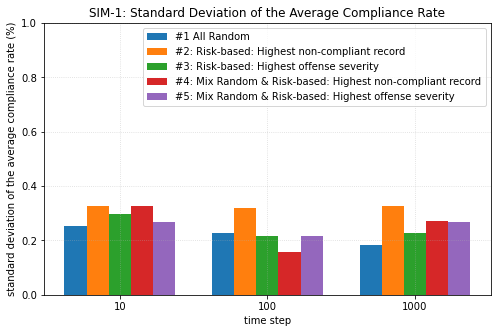

In [191]:
import numpy as np
import matplotlib.pyplot as plt

dataframes = [random_std, risknoncomp_std, riskoffense_std, mixnoncomp_std, mixoffense_std]
labels = ["#1 All Random",
          "#2: Risk-based: Highest non-compliant record",
          "#3: Risk-based: Highest offense severity",
          "#4: Mix Random & Risk-based: Highest non-compliant record",
          "#5: Mix Random & Risk-based: Highest offense severity"]

plt.figure(figsize=(8, 5))

x_ticks = np.arange(len(tick))
bar_width = 0.15

for i, df in enumerate(dataframes):
    result = find_std(tick, df)  # Assuming you have a function to calculate the result
    y = list(result.values())
    plt.bar(x_ticks + (i * bar_width), y, bar_width, label=labels[i])

plt.xlabel('time step')
plt.ylabel('standard deviation of the average compliance rate (%)')
plt.title('SIM-1: Standard Deviation of the Average Compliance Rate')
plt.xticks(x_ticks + (len(dataframes) * bar_width) / 2.5, tick)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, which='both', linestyle='dotted', zorder=0, alpha=0.5)

plt.show()


In [ ]:
plt.plot(sim1_random_step_std['step'], sim1_random_step_std['avg-compliance-rate-std'],label="#1 All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['avg-compliance-rate-std'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['avg-compliance-rate-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['avg-compliance-rate-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['avg-compliance-rate-std'],label="#5: Mix Random & Risk-based: Highest offense severity")


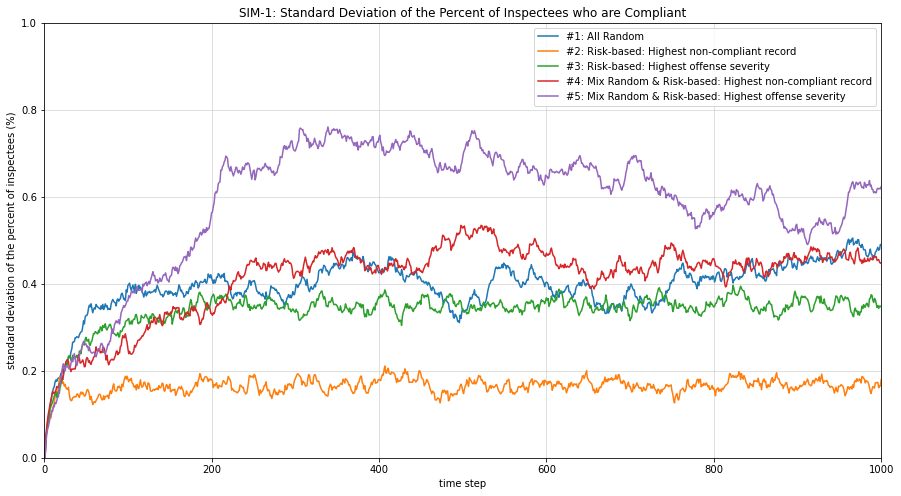

<Figure size 432x288 with 0 Axes>

In [20]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(np.arange(0, 1000.1, 100))
#ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
#ax.set_yticks(np.arange(0,100.1,10))
#ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim1_random_step_std['step'], sim1_random_step_std['perc-compliant-std'],label="#1: All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['perc-compliant-std'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['perc-compliant-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['perc-compliant-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['perc-compliant-std'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-1: Standard Deviation of the Percent of Inspectees who are Compliant")
plt.xlabel('time step')
plt.ylabel('standard deviation of the percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-1 Percent Compliant.png', dpi=300, bbox_inches='tight')

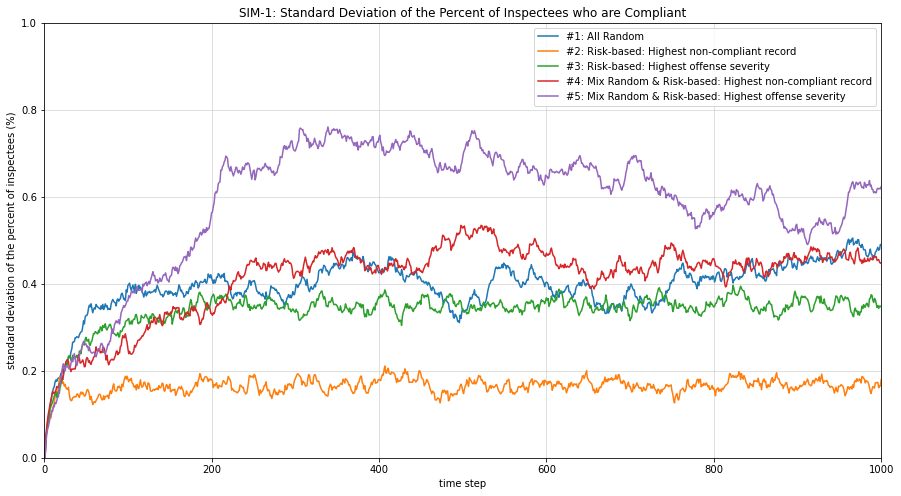

<Figure size 432x288 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(np.arange(0, 150.1, 10))
#ax.set_xticks(np.arange(0, 150.1, 5), minor=True)
#ax.set_yticks(np.arange(35,50.1,5))
#ax.set_yticks(np.arange(35,50.1,1), minor=True)

plt.plot(sim1_random_step_std['step'], sim1_random_step_std['perc-compliant-std'],label="#1: All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['perc-compliant-std'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['perc-compliant-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['perc-compliant-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['perc-compliant-std'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-1: Standard Deviation of the Percent of Inspectees who are Compliant")
plt.xlabel('time step')
plt.ylabel('standard deviation of the percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-1 Percent Compliant (zoomed).png', dpi=300, bbox_inches='tight')

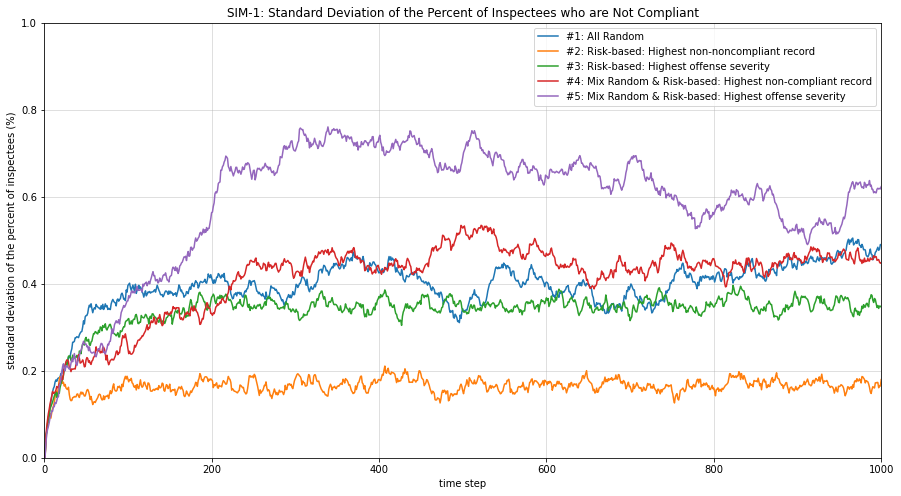

<Figure size 432x288 with 0 Axes>

In [22]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(np.arange(0, 1000.1, 100))
#ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
#ax.set_yticks(np.arange(0,100.1,10))
#ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim1_random_step_std['step'], sim1_random_step_std['perc-noncompliant-std'],label="#1: All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['perc-noncompliant-std'],label="#2: Risk-based: Highest non-noncompliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['perc-noncompliant-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['perc-noncompliant-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['perc-noncompliant-std'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-1: Standard Deviation of the Percent of Inspectees who are Not Compliant")
plt.xlabel('time step')
plt.ylabel('standard deviation of the percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-1 Percent Not Compliant.png', dpi=300, bbox_inches='tight')

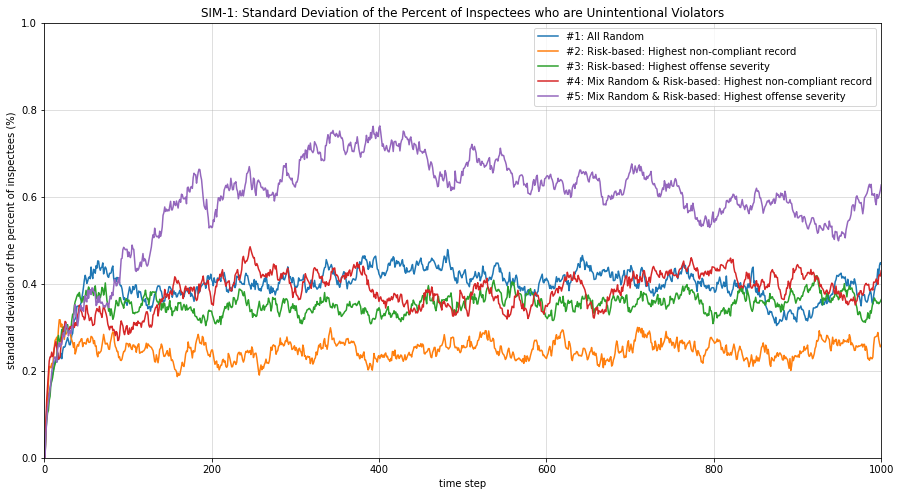

<Figure size 432x288 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(np.arange(0, 1000.1, 100))
#ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
#ax.set_yticks(np.arange(0,50.1,10))
#ax.set_yticks(np.arange(0,50.1,5), minor=True)

plt.plot(sim1_random_step_std['step'], sim1_random_step_std['perc-unintentional-std'],label="#1: All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['perc-unintentional-std'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['perc-unintentional-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['perc-unintentional-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['perc-unintentional-std'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-1: Standard Deviation of the Percent of Inspectees who are Unintentional Violators")
plt.xlabel('time step')
plt.ylabel('standard deviation of the percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-1 Percent Unintentional.png', dpi=300, bbox_inches='tight')

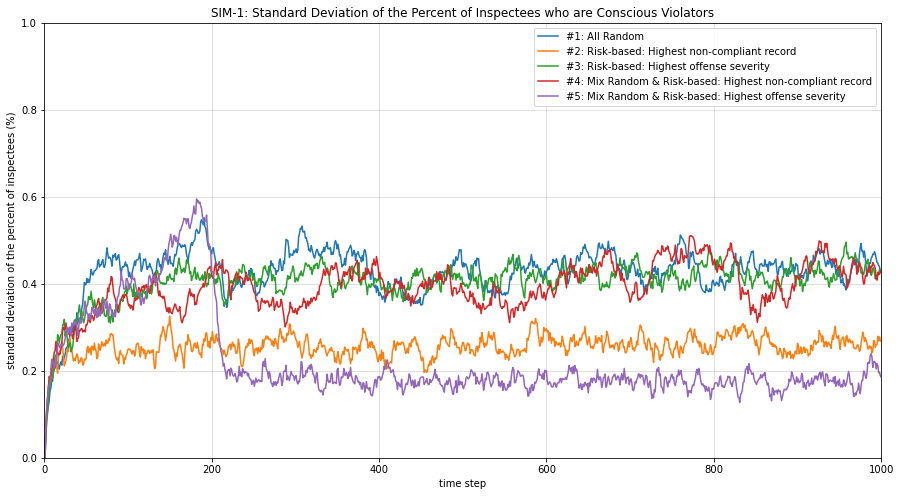

<Figure size 432x288 with 0 Axes>

In [25]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(np.arange(0, 1000.1, 100))
#ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
#ax.set_yticks(np.arange(0,100.1,10))
#ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim1_random_step_std['step'], sim1_random_step_std['perc-conscious-std'],label="#1: All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['perc-conscious-std'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['perc-conscious-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['perc-conscious-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['perc-conscious-std'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-1: Standard Deviation of the Percent of Inspectees who are Conscious Violators")
plt.xlabel('time step')
plt.ylabel('standard deviation of the percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-1 Percent Conscious.png', dpi=300, bbox_inches='tight')

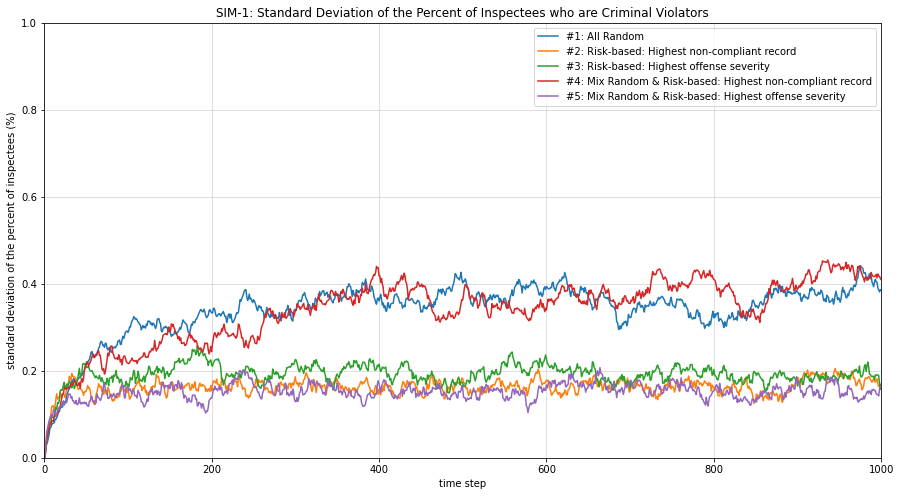

<Figure size 432x288 with 0 Axes>

In [26]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(np.arange(0, 1000.1, 100))
#ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
#ax.set_yticks(np.arange(0,100.01,10))
#ax.set_yticks(np.arange(0,100.01,5), minor=True)

plt.plot(sim1_random_step_std['step'], sim1_random_step_std['perc-criminal-std'],label="#1: All Random")
plt.plot(sim1_risknoncomp_step_std['step'], sim1_risknoncomp_step_std['perc-criminal-std'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim1_riskoffense_step_std['step'], sim1_riskoffense_step_std['perc-criminal-std'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim1_mixnoncomp_step_std['step'], sim1_mixnoncomp_step_std['perc-criminal-std'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim1_mixoffense_step_std['step'], sim1_mixoffense_step_std['perc-criminal-std'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-1: Standard Deviation of the Percent of Inspectees who are Criminal Violators")
plt.xlabel('time step')
plt.ylabel('standard deviation of the percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-1 Percent Criminal.png', dpi=300, bbox_inches='tight')